In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import cross_val_score, KFold

In [40]:
# Learning rate = how quickly module is adopted to the problem
# smaller learning rate rquired more traning epoch
# Alpha = learning rate determines the step size at each iteration of the gradient descent algorithm.

In [41]:
# define and set random state
RANDOM_STATE = 24  # used to generate the random number and shuffle before spliting it
np.random.seed(RANDOM_STATE) # set random seed for reproducible results

NOISE = 0.1 # identify pattern or relationship in a random state
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid')

TEST_SIZE = 0.2

<Figure size 1500x700 with 0 Axes>

In [42]:
data_df = pd.read_csv("boston_house_price.csv");
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


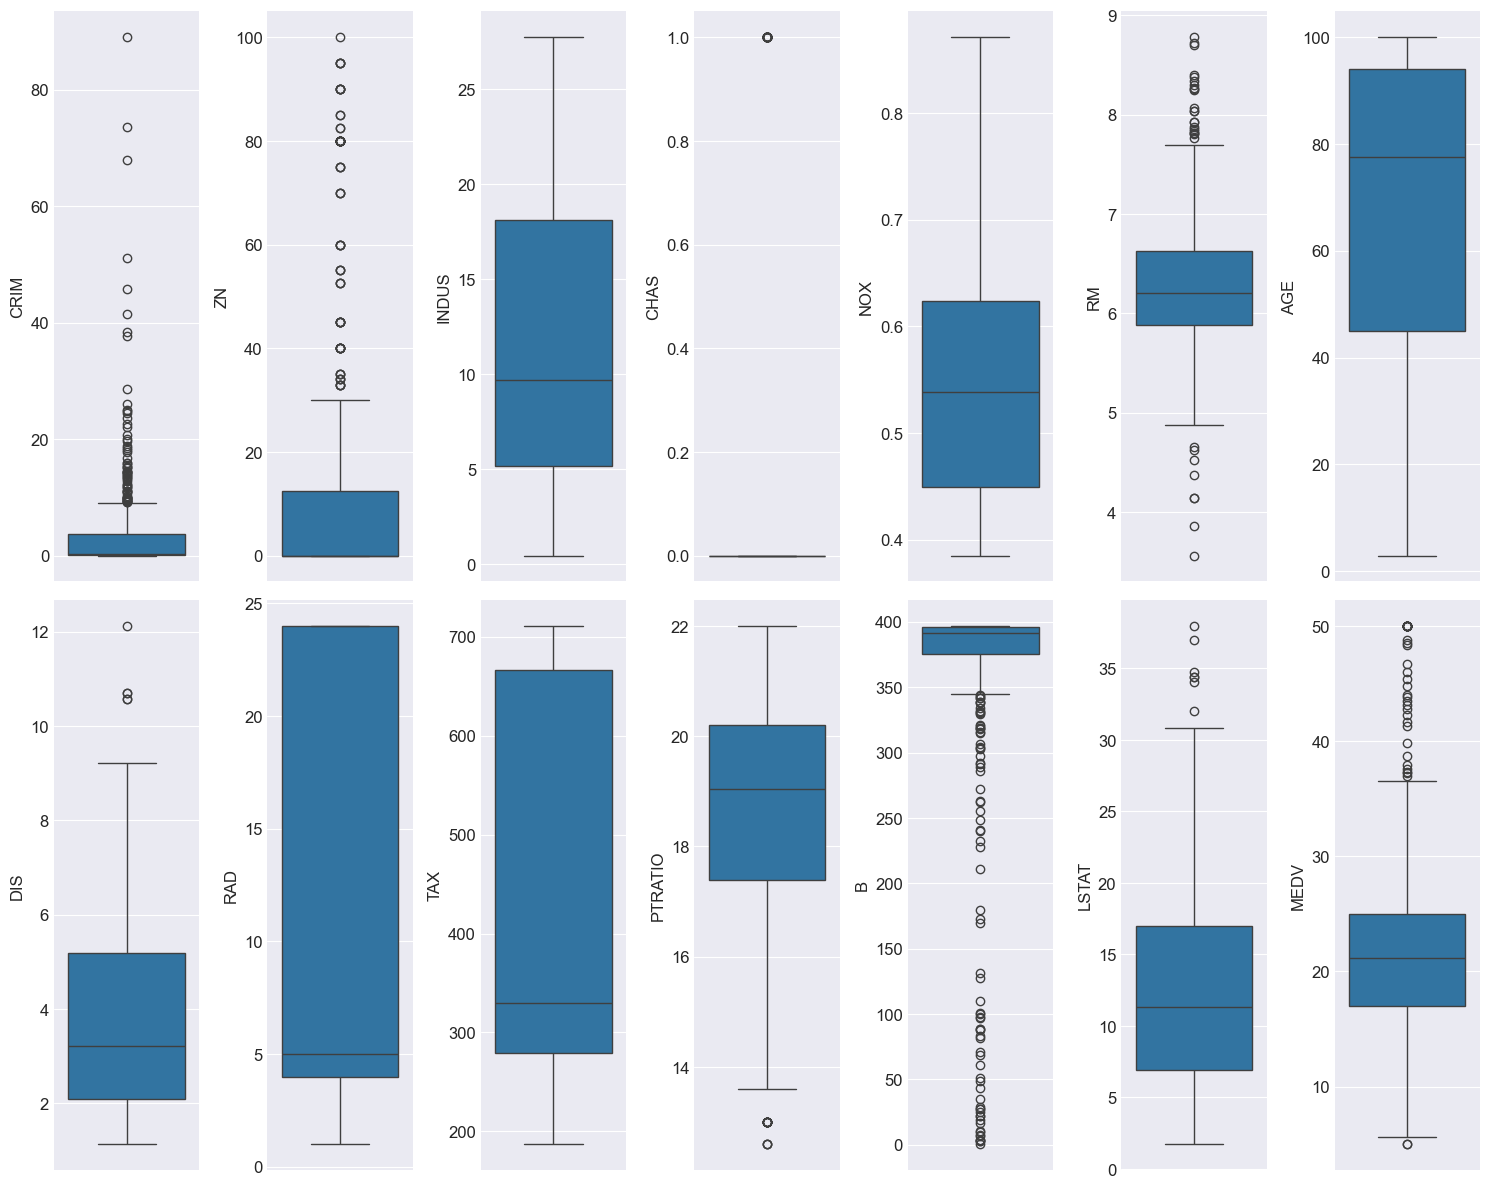

In [44]:
fig , axes = plt.subplots(ncols =7, nrows=2, figsize=(15,12))

axes = axes.ravel()  # returns contiguous flattened array

for count, col in enumerate(data_df.columns): # tarck the number of iteration in loop
    ax = axes[count]
    sns.boxplot(data = data_df, y =col,ax=ax)
plt.tight_layout()

In [45]:
print('Before :',data_df.shape)

data_df = data_df[data_df['MEDV'] < 50].copy()

print('after :',data_df.shape)

Before : (506, 14)
after : (490, 14)


In [46]:
outlier_list = []

for count, col in enumerate(data_df.columns):
    Q1 = np.percentile(data_df[col],25) # quartile 1

    Q3 = np.percentile(data_df[col],75) # quartile 3

    outlier_dist = (Q3 - Q1) * 1.5

    outlier_list.extend(data_df[data_df[col] < Q1 - outlier_dist].index)
    outlier_list.extend(data_df[data_df[col] > Q3 + outlier_dist].index)

len(outlier_list)

307

In [47]:
outlier_count = Counter(outlier_list)
outlier_count

Counter({412: 4,
         414: 4,
         367: 3,
         374: 3,
         384: 3,
         438: 3,
         203: 3,
         282: 3,
         262: 3,
         373: 2,
         386: 2,
         387: 2,
         399: 2,
         404: 2,
         406: 2,
         407: 2,
         409: 2,
         410: 2,
         411: 2,
         413: 2,
         415: 2,
         416: 2,
         417: 2,
         418: 2,
         419: 2,
         420: 2,
         422: 2,
         425: 2,
         426: 2,
         427: 2,
         429: 2,
         431: 2,
         434: 2,
         435: 2,
         436: 2,
         437: 2,
         444: 2,
         445: 2,
         454: 2,
         190: 2,
         196: 2,
         197: 2,
         198: 2,
         202: 2,
         256: 2,
         274: 2,
         276: 2,
         277: 2,
         286: 2,
         291: 2,
         351: 2,
         352: 2,
         353: 2,
         354: 2,
         355: 2,
         152: 2,
         154: 2,
         155: 2,
         160: 

In [48]:
print ('Before: ', data_df.shape)
data_df = data_df.drop([412, 414], axis=0).copy()
data_df.reset_index(inplace=True, drop = True)
print ('After: ', data_df.shape)

Before:  (490, 14)
After:  (488, 14)


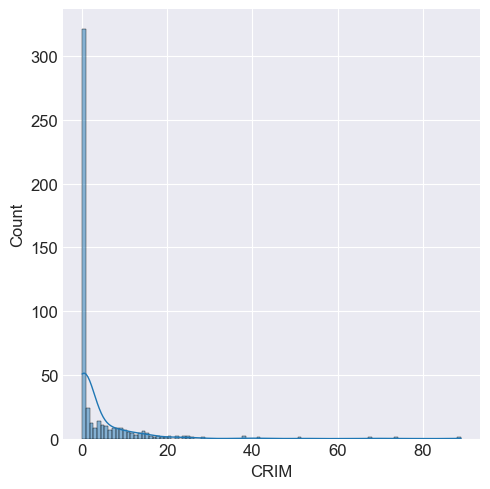

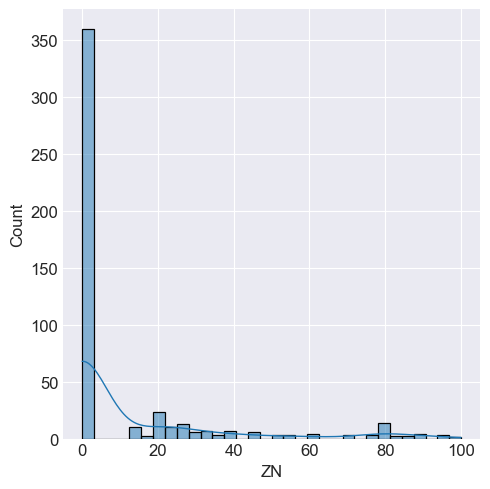

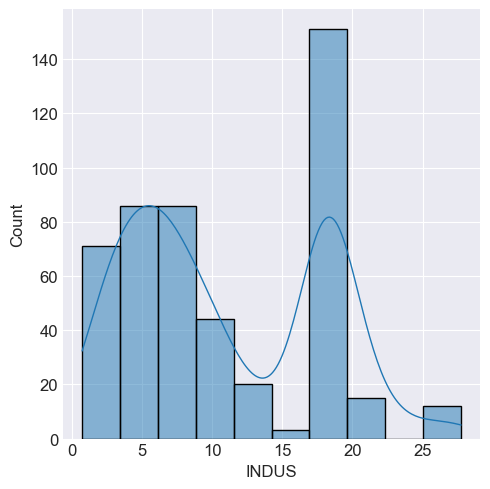

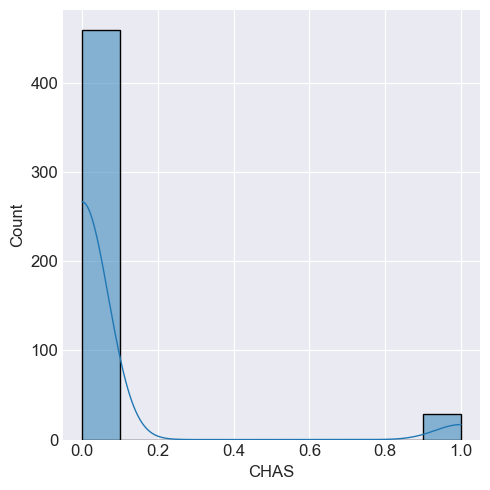

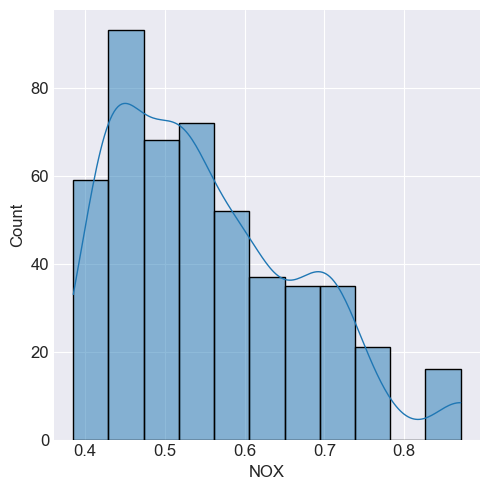

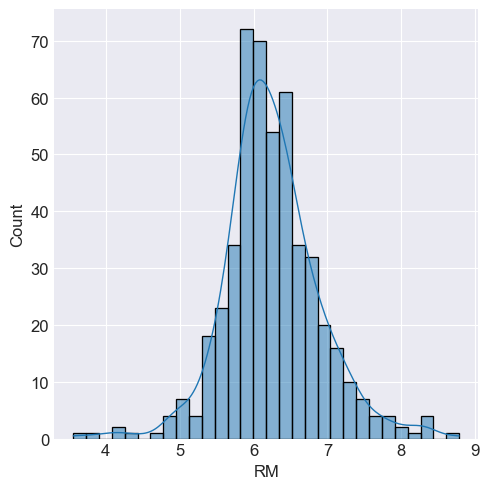

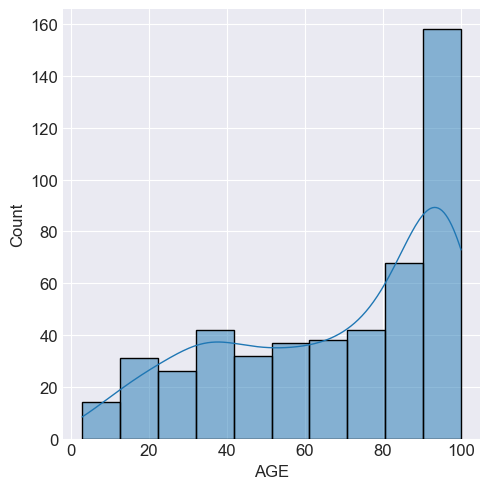

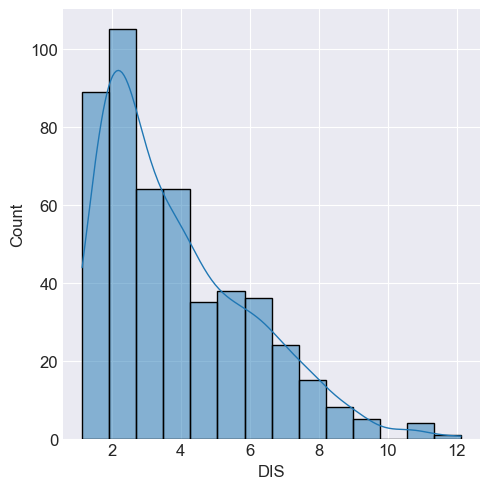

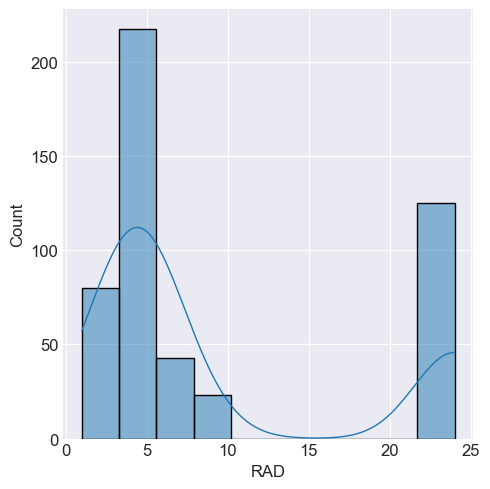

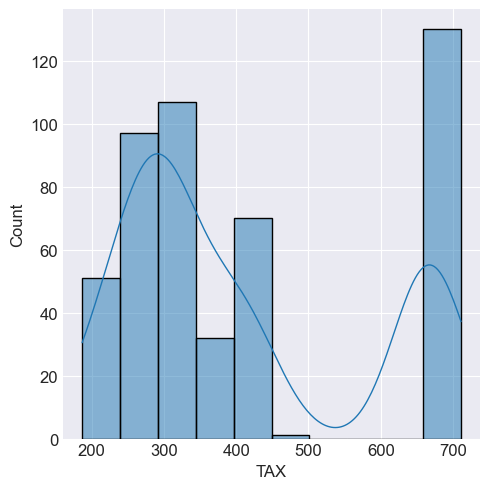

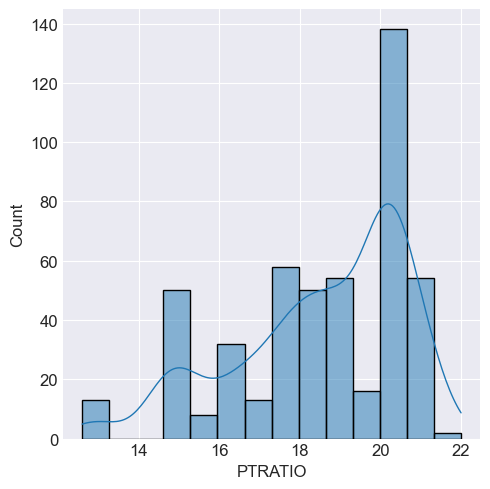

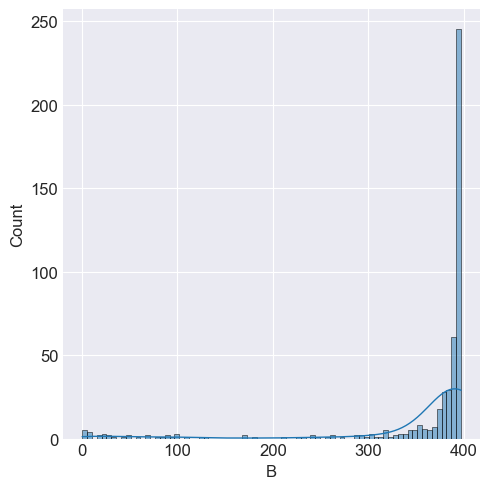

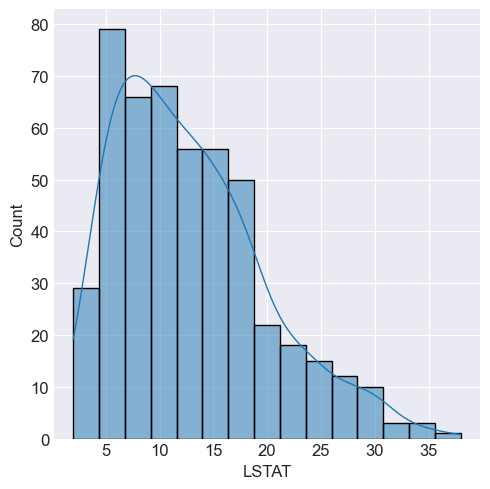

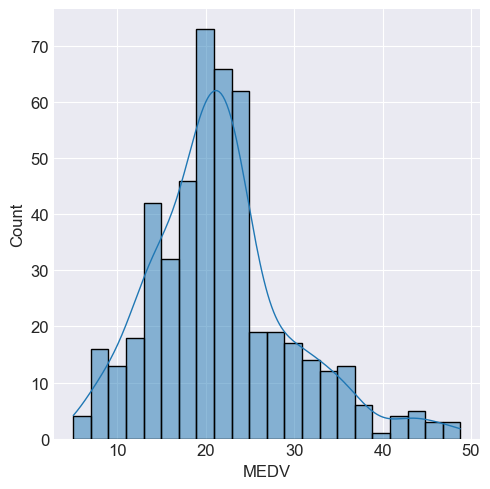

In [49]:
for count, col in enumerate(data_df.columns):

    sns.displot(data=data_df, x =col, kde=True) # distribution plots

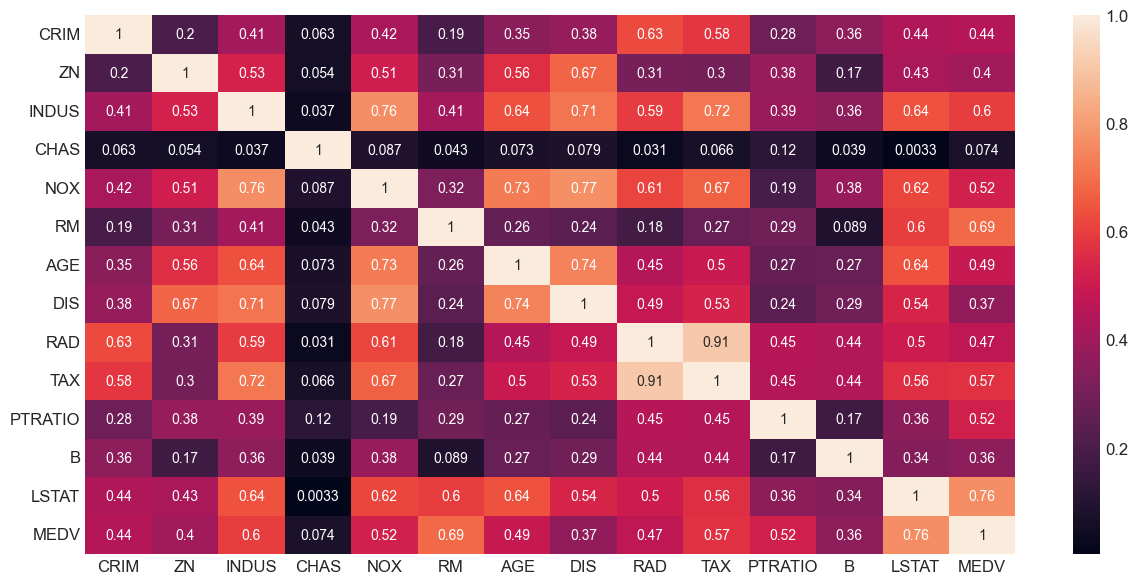

In [50]:
plt.figure()

sns.heatmap(data_df.corr().abs(), annot=True);

In [51]:
col_sel = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']

features_df = data_df[col_sel].copy()

target = data_df['MEDV']

print(features_df.shape, target.shape)

(488, 10) (488,)


In [52]:
features_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,5.33


In [53]:
scaler = MinMaxScaler()
features_df = pd.DataFrame(data=scaler.fit_transform(features_df),columns =col_sel)
features_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.000000,0.18,0.058148,0.314815,0.577505,0.641607,0.000000,0.208015,0.287234,0.083356
1,0.000236,0.00,0.234444,0.172840,0.547998,0.782698,0.043478,0.104962,0.553191,0.198944
2,0.000236,0.00,0.234444,0.172840,0.694386,0.599382,0.043478,0.104962,0.553191,0.056960
3,0.000293,0.00,0.053333,0.150206,0.658555,0.441813,0.086957,0.066794,0.648936,0.026674
4,0.000705,0.00,0.053333,0.150206,0.687105,0.528321,0.086957,0.066794,0.648936,0.093081


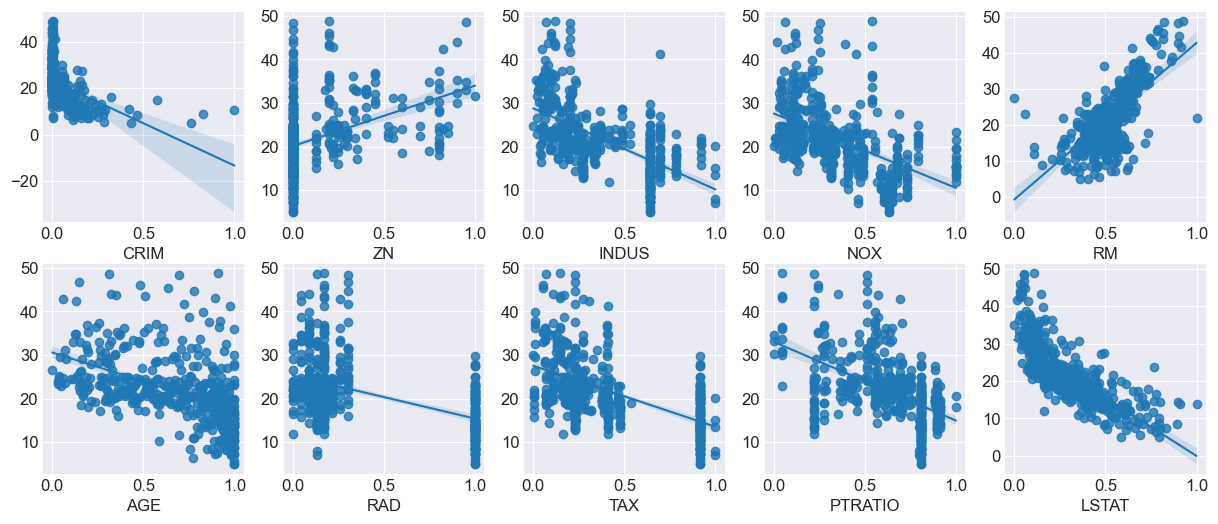

In [54]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15,6))
axes = axes.ravel()

for count, col in enumerate(col_sel):

    sns.regplot(x = features_df[col], y=target.to_numpy(), ax = axes[count])


### Eliminate Skew

In [55]:
y = np.log1p(target.to_numpy()) # 

for col in features_df.columns:

    skw = features_df[col].skew()

    print (f'Column {col}: Skew: {skw:7.4f}')

    if np.abs(skw) > 0.3: #address if skew is more than 0.3 ## Hard Coded

        print ('transforming column:', col)

        features_df[col] = np.log1p(features_df[col]) # take log
        

Column CRIM: Skew:  5.3802
transforming column: CRIM
Column ZN: Skew:  2.2348
transforming column: ZN
Column INDUS: Skew:  0.3314
transforming column: INDUS
Column NOX: Skew:  0.7616
transforming column: NOX
Column RM: Skew:  0.2215
Column AGE: Skew: -0.5828
transforming column: AGE
Column RAD: Skew:  1.0311
transforming column: RAD
Column TAX: Skew:  0.6932
transforming column: TAX
Column PTRATIO: Skew: -0.8175
transforming column: PTRATIO
Column LSTAT: Skew:  0.8605
transforming column: LSTAT


In [56]:
reg = LinearRegression()

kf = KFold(n_splits=10) ## Hard Coded

scores = cross_val_score(reg, features_df.to_numpy(), y, cv=kf, scoring='neg_mean_squared_error')

In [57]:
scores.mean(), scores.std()

(-0.03723700729265782, 0.028404458448644716)

In [58]:
reg.fit(features_df.to_numpy(), y)
y_pred = reg.predict(features_df.to_numpy())

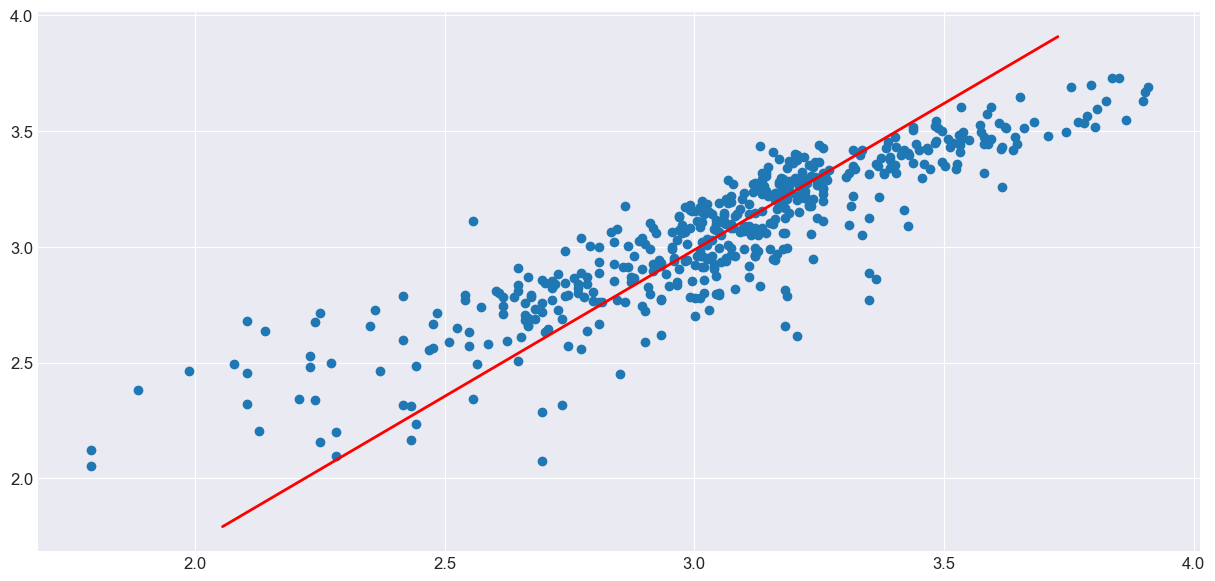

In [59]:
plt.scatter(y, y_pred)

plt.plot([y_pred.min(), y_pred.max()], [y.min(), y.max()], c = 'r', lw = 2);